## Observations and Insights

## Dependencies and starter code

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combineDataset = pd.merge(mouse_metadata, study_results, on="Mouse ID")

combineDataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
newData = combineDataset.groupby("Drug Regimen")

tumorMean = newData["Tumor Volume (mm3)"].mean()
tumorMedian = newData["Tumor Volume (mm3)"].median()
tumorVariance = newData["Tumor Volume (mm3)"].var()
tumorStdDev = newData["Tumor Volume (mm3)"].std()
tumorSem = newData["Tumor Volume (mm3)"].sem()

drugRegimen_df = pd.DataFrame({"Tumor Volume Mean": tumorMean, "Tumor Volume Median": tumorMedian, 
                               "Tumor Volume Variance": tumorVariance, "Tumor Volume Std. Deviation": tumorStdDev,
                              "Tumor Volume Std. Error": tumorSem})

drugRegimen_df.style.format({"Tumor Volume Mean":"{:,.3f}", "Tumor Volume Median":"{:,.3f}", 
                            "Tumor Volume Variance":"{:,.3f}", "Tumor Volume Std. Deviation":"{:,.3f}",
                            "Tumor Volume Std. Error":"{:,.3f}"})


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

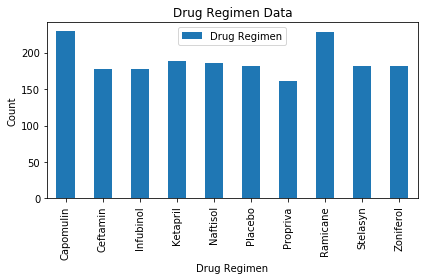

In [45]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugRegimenValue = pd.DataFrame(newData["Drug Regimen"].count())

drugRegimenValue.plot(kind="bar", title="Drug Regimen Data")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

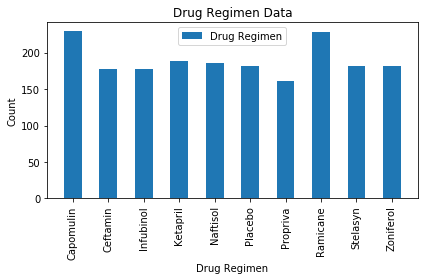

In [72]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axisDrug = np.arange(len(drugRegimenValue))
xtick_Locations = [values for values in x_axis]

plt.bar(x_axisDrug, drugRegimenValue["Drug Regimen"], align="center", width=0.5)
plt.xticks(xtick_Locations, list(drugRegimenValue.index), rotation="vertical")
label = ["Drug Regimen"] 
plt.legend(label, loc="upper center")
plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()

## Pie plots

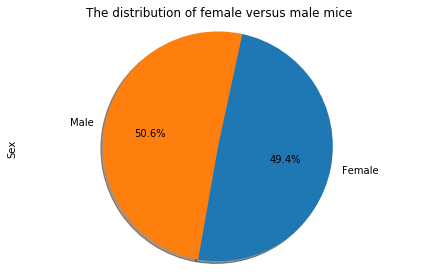

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genderData = combineDataset.groupby("Sex")
genderData_df = pd.DataFrame(genderData["Sex"].count())

genderData_df.plot(kind="pie", y="Sex", title="The distribution of female versus male mice", 
                   autopct="%1.1f%%", startangle=260, shadow= True, legend=False)
plt.axis("equal")
plt.tight_layout()
plt.show()

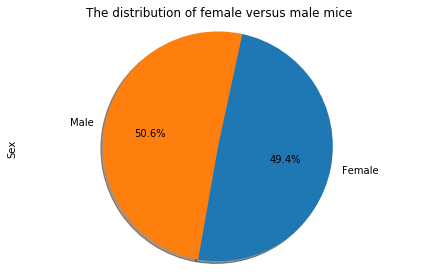

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(genderData_df['Sex'], labels=list(genderData_df.index.values), autopct="%1.1f%%", startangle=260, shadow = True)
plt.axis("equal")
plt.title("The distribution of female versus male mice")
plt.ylabel("Sex")
plt.tight_layout()


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
regimenList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate IQR




In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen